# M2: Cross Validating a Linear Regression Model
# DAV 6150

- Group Members: Qing Dou, Ruoyu Chen, Zhengnan Li
- Repository: https://github.com/Zhengnan817/DAV-6150/tree/main

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=pd.core.generic.SettingWithCopyWarning)

# 1. Introduction
In this analysis, our goal is to construct a cross-validated linear regression model to predict the weight of a passenger vehicle using a dataset from the UC Irvine machine learning archive.


### 1.1 Approach
We devide the work into 4 steps:
- Explanatory Data Analysis (EDA):   Explore and analyze the dataset to uncover patterns and gain insights into its structure.

- Data Cleaning:   Address missing values to prepare the data for modeling.

- Prepped Data Overview:  Provide a summary of changes made during data cleaning, present overall statistics to provide overview for explanatory variables selection and model building.

- Regression Model Construction & Evaluation:  Construct cross-validated linear regression models based on preprocessed data and assess their performance using appropriate metrics.

### 1.2 Dataset
The dataset we will be using is sourced from the UC Irvine machine learning archive: https://archive.ics.uci.edu/ml/datasets/Automobile. The data set is comprised of 205 observations and 26 attributes. 
As the assignment requires, the curb-weight variable will serve as the response variable for our regression model. The explanatory variables you may choose from are as follows: height, width, length, wheel-base, 
engine-size, horsepower, peak-rpm, and city-mpg. __All other attributes contained within the data set should be ignored for this Assignment.__  
From the UCI web page we can learn about the details on these variables:

| Attribute    | Type      | Description                                               | Range           |
|--------------|-----------|-----------------------------------------------------------|-----------------|
| Height       | Numerical | The height of the vehicle                                 | 47.8 to 59.8    |
| Width        | Numerical | The width of the vehicle                                  | 60.3 to 72.3    |
| Length       | Numerical | The length of the vehicle                                 | 141.1 to 208.1  |
| Wheel-base   | Numerical | The distance between the front and rear wheels            | 86.6 to 120.9   |
| Engine-size  | Numerical | The displacement of the engine                            | 61 to 326       |
| Horsepower   | Numerical | The power output of the engine                            | 48 to 288       |
| Peak-rpm     | Numerical | The maximum revolutions per minute of the engine          | 4150 to 6600    |
| City-mpg     | Numerical | The vehicle's fuel efficiency in urban areas              | 13 to 49        |
| Curb-weight  | Numerical | The weight of the vehicle without passengers or cargo     | 1488 to 4066    |


Read the data from our github repository and assign the coulumns according to UCI web page. Then select the explanatory and response variable we need in this analysis. The dataframe is shown below.

In [103]:
passager_vehicle_raw = pd.read_csv("https://raw.githubusercontent.com/jc000222/Data_Science_DAV6150/main/M2/src/M2_Data.csv", header=None)
passager_vehicle_raw.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
                 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
                 'wheel-base', 'length', 'width', 'height', 'curb-weight',
                 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
                 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
                 'city-mpg', 'highway-mpg', 'price']

explanatory_variables = ['wheel-base', 'length', 'width', 'height', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg']
response_variable = ['curb-weight']

passager_vehicle = passager_vehicle_raw[[col for col in passager_vehicle_raw.columns if col in explanatory_variables+response_variable]]                 
passager_vehicle

,wheel-base,length,width,height,curb-weight,engine-size,horsepower,peak-rpm,city-mpg
0,88.6,168.8,64.1,48.8,2548,130,111,5000,21
1,88.6,168.8,64.1,48.8,2548,130,111,5000,21
2,94.5,171.2,65.5,52.4,2823,152,154,5000,19
3,99.8,176.6,66.2,54.3,2337,109,102,5500,24
4,99.4,176.6,66.4,54.3,2824,136,115,5500,18
...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,114,5400,23
201,109.1,188.8,68.8,55.5,3049,141,160,5300,19
202,109.1,188.8,68.9,55.5,3012,173,134,5500,18
203,109.1,188.8,68.9,55.5,3217,145,106,4800,26


### 1.3 Problem Summary
We conduct three different linear regression models and try to evaluate them and find the best model:

1. Choose wheel-base, length, width, and engine-size as explanatory variables.
(short explain)
2. Choose wheel-base, length, width, and engine-size as explanatory variables.
(short explain)
3. Choose wheel-base, length, width, and engine-size as explanatory variables.
(short explain)

# 2. Exploratory Data Analysis

### 2.1 Data Cleaning
2.1.1 Null value

First, check the null values. We realize the dataset has '?' for null values instead of 'NaN'. In order to filter these '?' in the dataset, we use to_numeric to convert the numeric explanatory variables into numbers, and '?' into NaN.  
There are 2 rows of null values on attribute horsepower and peak-rpm.

wheel-base     0
length         0
width          0
height         0
curb-weight    0
engine-size    0
city-mpg       0
horsepower     2
peak-rpm       2
dtype: int64

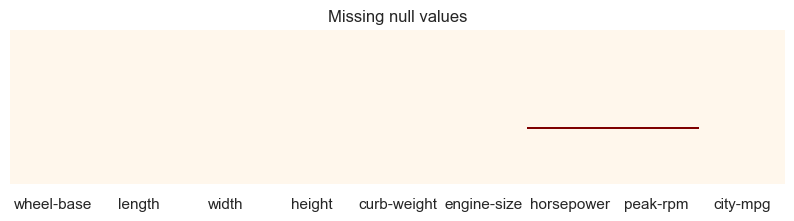

In [104]:
for column in explanatory_variables+response_variable:
    passager_vehicle[column] = pd.to_numeric(passager_vehicle[column], errors='coerce')
plt.rcParams["figure.figsize"] = (10, 2)
sns.heatmap(passager_vehicle.isnull(), yticklabels=False, cbar=False, cmap="OrRd")
plt.title("Missing null values")
passager_vehicle.isnull().sum().sort_values()

Check the 2 rows of null values. We can see the make of the car is renault and indicates that it's the same engine on different car models.  
Search the bore, stroke, engine-size, compression-ratio,4 cylinders OHV engine, the engine basic model seems to be M4R or F4R. F4R is both equipped on Renault Clio(hatchback) and Laguna (wagon). Horsepower is about 130hp and peak-rpm differs from 5250 to 6500.

In [105]:
passager_vehicle[passager_vehicle.isnull().any(axis=1)]

,wheel-base,length,width,height,curb-weight,engine-size,horsepower,peak-rpm,city-mpg
130,96.1,181.5,66.5,55.2,2579,132,NaN,NaN,23
131,96.1,176.8,66.6,50.5,2460,132,NaN,NaN,23


Try to replace the null values with mean of the dataset. To make the data more convincing, we choose the num-of-cylinders as 'four', fuel-system as 'mpfi' and fuel-type as 'gas'. We get the Mean of horsepower is 111 and peak-rpm is 5208.  Replace the null value with mean.

In [106]:
conditions =  (passager_vehicle_raw['num-of-cylinders'] == 'four') & \
              (passager_vehicle_raw['fuel-system'] == 'mpfi') & \
              (passager_vehicle_raw['fuel-type'] == 'gas')

for column in ['horsepower', 'peak-rpm']:
    mean_value = passager_vehicle.loc[conditions, column].mean()
    passager_vehicle[column] = passager_vehicle[column].replace('?', np.nan)
    passager_vehicle.loc[conditions & passager_vehicle[column].isnull(), column] = mean_value

    print(f'Mean of {column} : {mean_value}')
passager_vehicle[passager_vehicle_raw['make']=='renault']

Mean of horsepower : 111.65454545454546
Mean of peak-rpm : 5208.181818181818


,wheel-base,length,width,height,curb-weight,engine-size,horsepower,peak-rpm,city-mpg
130,96.1,181.5,66.5,55.2,2579,132,111.654545,5208.181818,23
131,96.1,176.8,66.6,50.5,2460,132,111.654545,5208.181818,23


### 2.2 Prepped Data Overview

2.2.1 Column overview
Let's first take a look at the data distribution of each column, which will help us understand the data and model.

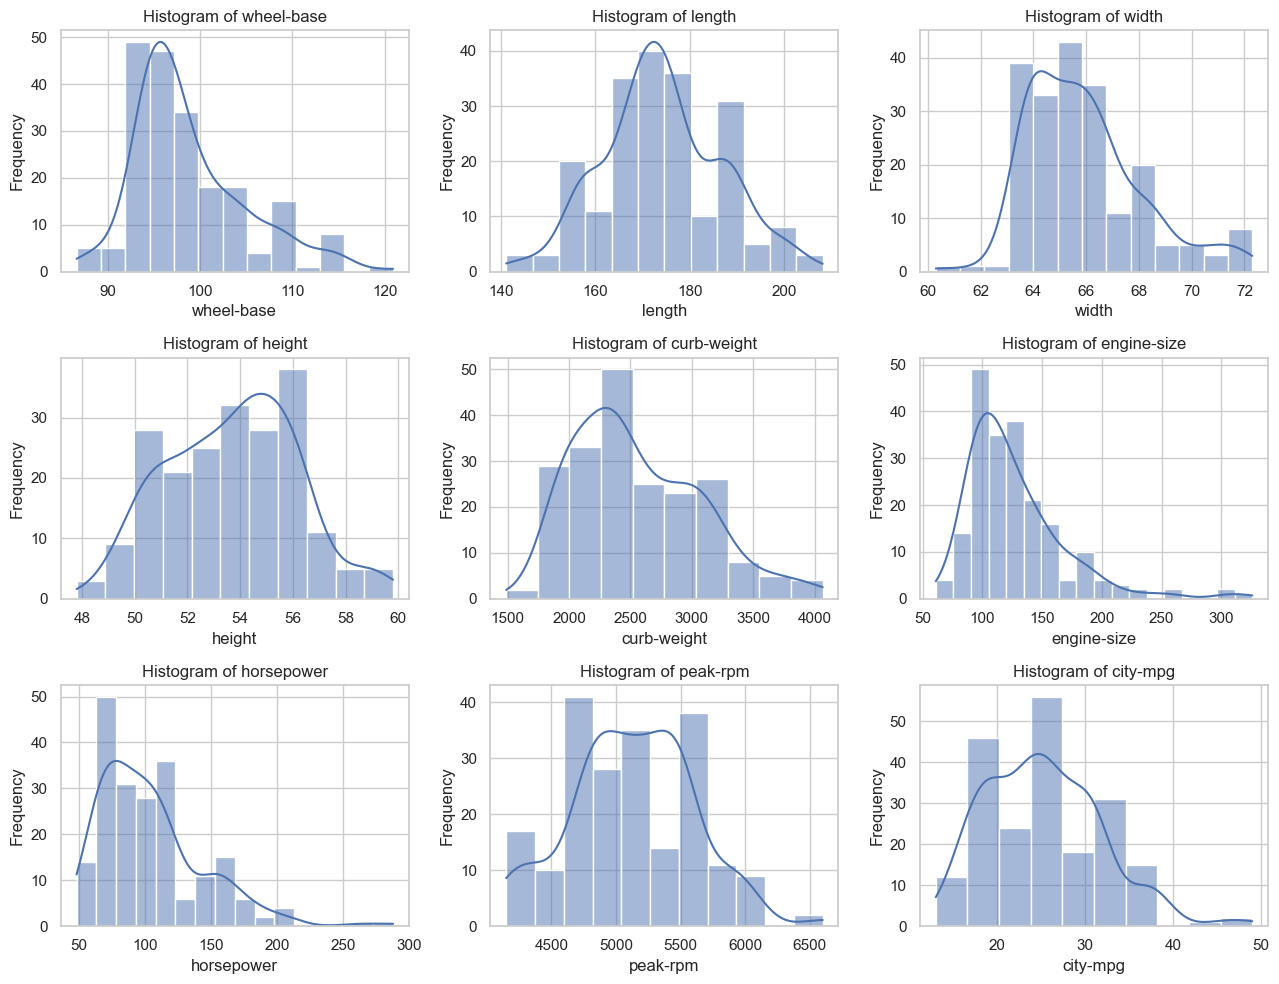

In [110]:
# Set up the matplotlib figure
sns.set(style="whitegrid")

# Number of rows and columns
n_rows = 3
n_cols = 3

# Creating a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(13, 10))

# Flattening the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(passager_vehicle.columns):
    sns.histplot(passager_vehicle[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust lable for horsepower and peak-rpm
if column in ['horsepower', 'peak-rpm']:
    # Set the major tick locator based on the column name
    if column == 'horsepower':
        axes[i].xaxis.set_major_locator(ticker.MultipleLocator(10))
    elif column == 'peak-rpm':
        axes[i].xaxis.set_major_locator(ticker.MultipleLocator(100))
    
    # Set the rotation of the x-axis labels
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=70)
# Adjust layout
plt.tight_layout()
plt.show()

Then, we look at the relationship between each column and the response variable, which can provide us with some directions for selecting prediction models and variables.
It can be seen from the above heat map that whell-base, length, width, engine-size, and horsepower are positively correlated, and city-mpg is negatively correlated.

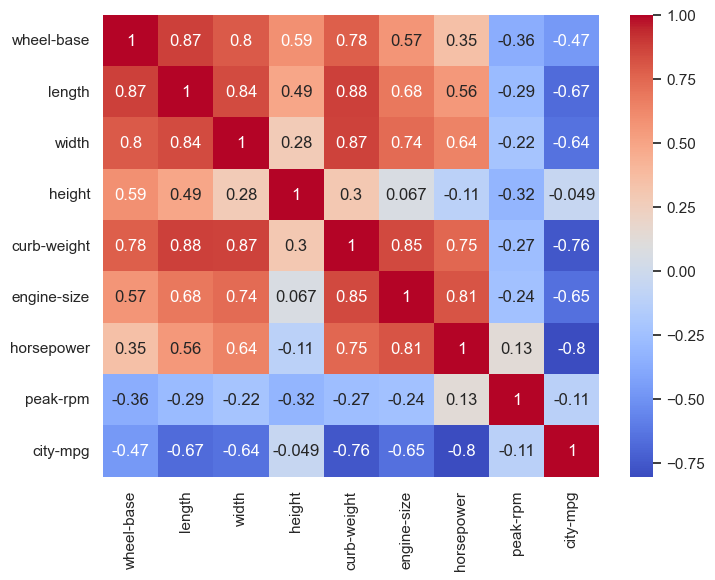

In [120]:
# Calculate the correlation matrix
correlation_matrix = passager_vehicle.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Get a overview of the cleaned dataset. The charts below shows the scatter plot of each explanatory variables and the response variable and the correlation. It can be seen that most explanatory variables has a linear correlation with the response variable.

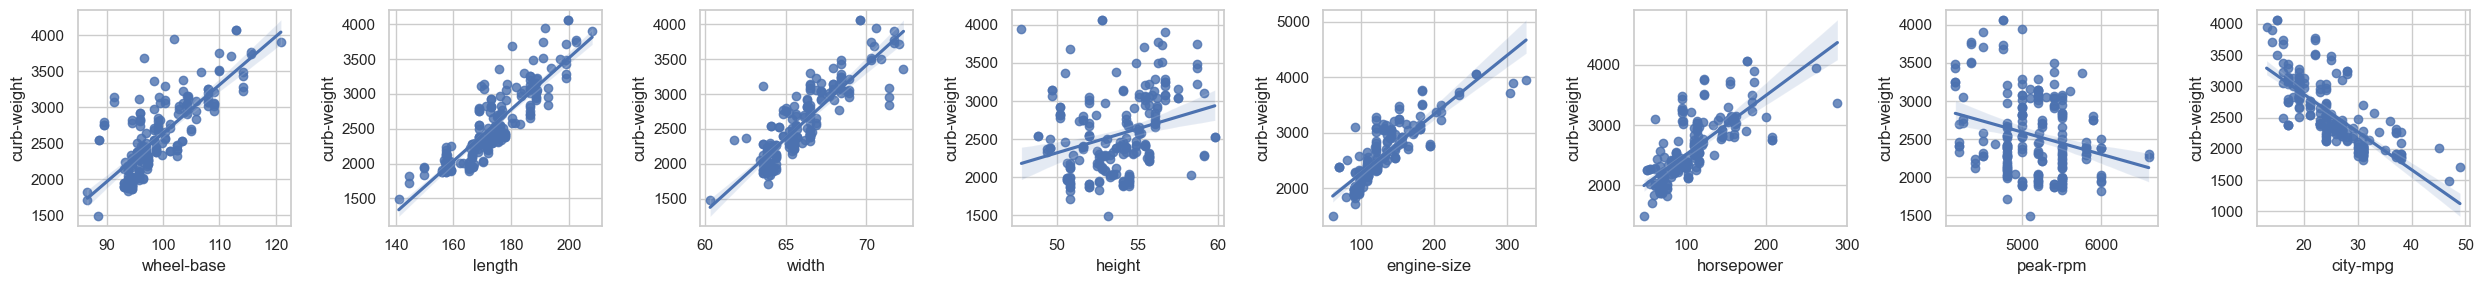

In [109]:
num_val = ['height', 'width', 'length', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg']
fig, axes = plt.subplots(1,8, figsize=(25,3))

for i, f in enumerate(explanatory_variables):
    sns.regplot(x=f, y='curb-weight', data=passager_vehicle, ax=axes[i])

plt.tight_layout()
plt.show()

Reference: 

https://archive.ics.uci.edu/ml/datasets/Automobile
https://en.wikipedia.org/wiki/List_of_Renault_engines#J
http://portal.enginedesk.net/model/renault/master_i/22_type_30_box/parts/167750/2106/BOD